In [1]:
jijace_list=[["강남구" , 11680] , ["강동구" ,11740], ["강북구" , 11305], ["강서구" , 11500],  ["관악구", 11620], ["광진구" , 11215], ["구로구" ,11530],
            ["금천구",11545], ["노원구" , 11350] ,["도봉구",11320], ["동대문구",11230], ["동작구" , 11590], ["마포구" ,11440] , ["서대문구" ,11410] , ["서초구", 11650],
            ["성동구" , 11200], ["성북구" , 11290], ["송파구" , 11710], ["양천구" ,11470], ["영등포구" , 11560], ["용산구" , 11170], ["은평구" , 11380],
            ["종로구", 11110] , ["중구" , 11140], ["중랑구",11260]]

In [2]:
year_list=[2018,2019,2020,2021,2022]

In [4]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as BS 
from tqdm import tqdm
url="https://tmacs.kotsa.or.kr/web/TG/TG200/TG2100S/Tgsearch01_AJAX.jsp"
payload={"gubun":"S1203", 
"mid":"S1203",
"sYear":"2018", 
"eYear":"2018", 
"sido":"11000",
"jijace":"11680",  
"kind1":"s102",
"kind2":"s1021",
"cartype":"07"} #자전거 카타입

# data = r.text


In [7]:
# r = requests.post(url, data=payload)
# bs = eval(r.text)
# df = pd.DataFrame(bs)

In [12]:
# df

In [14]:
violation_accident_cycle_month_df=pd.DataFrame()
for i in tqdm(range(len(jijace_list))):
    for j in range(len(year_list)):
        payload["sYear"]=year_list[j]
        payload["eYear"]=year_list[j]
        payload["jijace"]=jijace_list[i][1]
            # print(year_list[j])
            # print(jijace_list[i][1])
        r = requests.post(url, data=payload)
        bs = eval(r.text)
        df = pd.DataFrame(bs)
        df["YEAR"]=year_list[j]
        df["BASE_CATEGORY"]= "위반"
        df.rename(columns={"GUBUN_NM" : "MONTH"},inplace=True)
        violation_accident_cycle_month_df = pd.concat([violation_accident_cycle_month_df, df], axis = 0)
            # pd.set_option('display.max_columns', None)
            # for k in range(len(data)):
            #     SIDO_NM_list.append(data[k]["SIDO_NM"])
            #     JIJACE_NM_list.append(data[k]["JIJACE_NM"])
            #     BASE_NAME_list.append(data[k]["BASE_NAME"])
            #     GUBUN_NM_list.append(data[k]["GUBUN_NM"])
            #     ACC_CNT_list.append(data[k]["ACC_CNT"])
            #     BIG_CNT_list.append(data[k]["BIG_CNT"])
            #     PSGT_CNT_list.append(data[k]["PSGT_CNT"])
            #     TRK_CNT_list.append(data[k]["TRK_CNT"])
            #     DEATH_CNT_list.append(data[k]["DEATH_CNT"])
            #     CHISA_list.append(data[k]["CHISA"])
            #     YEAR_list.append(year_list[j])


100%|███████████████████████████████████████████████████████████████████████████████████| 25/25 [01:22<00:00,  3.30s/it]


In [20]:
violation_accident_cycle_month_df["ACC_CNT"].sum()

8492

In [28]:
import pickle
with open("./violation_accident_cycle_month.pkl","wb") as f:
     pickle.dump(violation_accident_cycle_month_df,f)

In [26]:
# violation_accident_cycle_month_df

In [29]:
import pymysql
con =pymysql.connect(host='ip', user='id', password='pw', db='encore6', charset='utf8')
cur = con.cursor()
cur.execute("show tables")

7

In [32]:
sql= """CREATE Table violation_accident_cycle_month
(
    `JIJACE_NM` VARCHAR(30),
    `CHISA` FLOAT,
    `ACC_HUM` INT,
    `SIDO_CD` INT,
    `MONTH` VARCHAR(2),
    `SLTWD_CNT` INT,
    `SERI_ACC` INT,
    `SIDO_NM` VARCHAR(10),
    `AC_MODE` VARCHAR(4),
    `CRT_JIJACE_CD` INT ,
    `BASE_NAME` VARCHAR(30),
    `BIG_CNT` INT,
    `PSGT_CNT` INT,
    `WND_ACC` INT,
    `ACC_CNT` INT,
    `TRK_CNT` INT,
    `DEATH_CNT` INT,
    `BASE_CODE` VARCHAR(10),
    `WND_CNT` INT,
    `DEATH_ACC` INT,
    `GUBUN` VARCHAR(5),
    `SERI_CNT` INT,
    `SLTWD_ACC` INT,
    `YEAR` INT,
    `BASE_CATEGORY` VARCHAR(10)
)"""
cur.execute(sql)
con.commit()

In [33]:
insert_sql="INSERT INTO violation_accident_cycle_month VALUES (%s, %s, %s, %s, %s,%s, %s, %s, %s, %s,%s,%s, %s, %s, %s, %s,%s, %s, %s, %s, %s,%s,%s,%s,%s)"

In [34]:
violation_accident_cycle_month_df.apply(lambda x : cur.execute(insert_sql,x.tolist()),axis=1)

0     1
1     1
2     1
3     1
4     1
     ..
40    1
41    1
42    1
43    1
44    1
Length: 3605, dtype: int64

In [35]:
con.commit()

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc 
import matplotlib.font_manager as fm

In [161]:
violation_accident_cycle_month_df.head(1)

,JIJACE_NM,CHISA,ACC_HUM,SIDO_CD,MONTH,SLTWD_CNT,SERI_ACC,SIDO_NM,AC_MODE,CRT_JIJACE_CD,...,TRK_CNT,DEATH_CNT,BASE_CODE,WND_CNT,DEATH_ACC,GUBUN,SERI_CNT,SLTWD_ACC,YEAR,BASE_CATEGORY
0,강남구,0.0,2,11000,02,2,0,서울,A,11680,...,0,0,01,0,0,02,0,1,2018,위반


In [162]:
violation_accident_cycle_month_df

,JIJACE_NM,CHISA,ACC_HUM,SIDO_CD,MONTH,SLTWD_CNT,SERI_ACC,SIDO_NM,AC_MODE,CRT_JIJACE_CD,...,TRK_CNT,DEATH_CNT,BASE_CODE,WND_CNT,DEATH_ACC,GUBUN,SERI_CNT,SLTWD_ACC,YEAR,BASE_CATEGORY
0,강남구,0.0,2,11000,02,2,0,서울,A,11680,...,0,0,01,0,0,02,0,1,2018,위반
1,강남구,0.0,2,11000,09,2,0,서울,A,11680,...,0,0,01,0,0,09,0,2,2018,위반
2,강남구,0.0,2,11000,02,1,0,서울,A,11680,...,0,0,02,1,0,02,0,1,2018,위반
3,강남구,0.0,3,11000,03,1,1,서울,A,11680,...,0,0,02,0,0,03,2,1,2018,위반
4,강남구,0.0,1,11000,06,0,1,서울,A,11680,...,0,0,02,0,0,06,1,0,2018,위반
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,중랑구,0.0,2,11000,07,0,1,서울,A,11260,...,0,0,99,1,0,07,1,0,2022,위반
41,중랑구,0.0,1,11000,08,1,0,서울,A,11260,...,0,0,99,0,0,08,0,1,2022,위반
42,중랑구,0.0,1,11000,09,1,0,서울,A,11260,...,0,0,99,0,0,09,0,1,2022,위반
43,중랑구,0.0,2,11000,11,1,1,서울,A,11260,...,0,0,99,0,0,11,1,1,2022,위반


In [118]:
len(violation_accident_cycle_month_df["MONTH"].value_counts())

12

In [119]:
(violation_accident_cycle_month_df["YEAR"].value_counts())

YEAR
2019    770
2021    736
2022    710
2020    699
2018    690
Name: count, dtype: int64

In [169]:
violation_accident_cycle_month_df_group=violation_accident_cycle_month_df.groupby(["YEAR","MONTH"],as_index=False)[['ACC_CNT']].sum().sort_values(by=["YEAR","MONTH"])

In [61]:
# violation_accident_cycle_month_df_2018 = violation_accident_cycle_month_df[violation_accident_cycle_month_df.YEAR==2018]
# violation_accident_cycle_month_df_2019 = violation_accident_cycle_month_df[violation_accident_cycle_month_df.YEAR==2019]
# violation_accident_cycle_month_df_2020 = violation_accident_cycle_month_df[violation_accident_cycle_month_df.YEAR==2020]
# violation_accident_cycle_month_df_2021 = violation_accident_cycle_month_df[violation_accident_cycle_month_df.YEAR==2021]
# violation_accident_cycle_month_df_2022 = violation_accident_cycle_month_df[violation_accident_cycle_month_df.YEAR==2022]

In [120]:
# violation_accident_cycle_month_2018_group= df2 = violation_accident_cycle_month_df_2018.groupby(["MONTH"],as_index=False)[['ACC_CNT']].sum().sort_values(by=["MONTH"])

# violation_accident_cycle_month_2019_group= df2 = violation_accident_cycle_month_df_2019.groupby(["MONTH"],as_index=False)[['ACC_CNT']].sum().sort_values(by=["MONTH"])

# violation_accident_cycle_month_2020_group= df2 = violation_accident_cycle_month_df_2020.groupby(["MONTH"],as_index=False)[['ACC_CNT']].sum().sort_values(by=["MONTH"])

# violation_accident_cycle_month_2021_group= df2 = violation_accident_cycle_month_df_2021.groupby(["MONTH"],as_index=False)[['ACC_CNT']].sum().sort_values(by=["MONTH"])

# violation_accident_cycle_month_2022_group= df2 = violation_accident_cycle_month_df_2022.groupby(["MONTH"],as_index=False)[['ACC_CNT']].sum().sort_values(by=["MONTH"])

In [121]:
violation_accident_cycle_month_2018_group

,MONTH,ACC_CNT
0,01,62
1,02,68
2,03,94
3,04,129
4,05,146
5,06,206
6,07,141
7,08,125
8,09,171
9,10,154


In [79]:
# val_list = violation_accident_cycle_month_2018_group.values.tolist()

In [80]:
# val_list

In [81]:
# temp_list=[]
# for i in range(12):
#     temp_list.append(val_list[i][0])

In [82]:
# temp_list

In [95]:
# 전체 따릉이 이용건수
CycleRentUse_df = pd.read_sql_query("select * from CycleRentUse", con=con)

/tmp/ipykernel_17423/644036148.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  CycleRentUse_df = pd.read_sql_query("select * from CycleRentUse", con=con)


In [123]:
CycleRentUse_year_df=CycleRentUse_df.groupby(["Rent_Date"],as_index=False)[['Rent_Count']].sum().sort_values(by=["Rent_Date"])

In [166]:
# CycleRentUse_year_df
# violation_accident_cycle_month_df_group
# 2018~2022년까지 월별레 따릉이 사용자수

In [234]:
# str(violation_accident_cycle_month_df_group.head(1)["YEAR"])+"!"

In [228]:
# print(str(a.YEAR))
print(str(a.MONTH).strip())

0    01
Name: MONTH, dtype: object


In [219]:
str(a.YEAR)+str(a.MONTH)

'0    2018\nName: YEAR, dtype: int640    01\nName: MONTH, dtype: object'

In [126]:
temp_2018.head(1)

,Rent_Date,Rent_Count
0,2018-01,164320


In [107]:
# CycleRentUse_year_df서 2018년 꺼만가졍
temp_2018 = CycleRentUse_year_df[:12]

In [235]:
violation_accident_cycle_month_2018_group.head(1)

,MONTH,ACC_CNT
0,01,62


In [109]:
# temp_2018

In [ ]:
# CycleRentUse_year_df
# violation_accident_cycle_month_df_group

In [171]:
total = pd.concat([CycleRentUse_year_df,violation_accident_cycle_month_df_group ], axis = 1)

In [172]:
# total.head(1)

,Rent_Date,Rent_Count,YEAR,MONTH,ACC_CNT
0,2018-01,164320,2018,01,62


In [198]:
total["VALUE"]=total["ACC_CNT"]/total["Rent_Count"]

In [199]:
total.head(20)


,Rent_Date,Rent_Count,YEAR,MONTH,ACC_CNT,VALUE
0,2018-01,164320,2018,01,62,0.000377
1,2018-02,168687,2018,02,68,0.000403
2,2018-03,462584,2018,03,94,0.000203
3,2018-04,668474,2018,04,129,0.000193
4,2018-05,929061,2018,05,146,0.000157
5,2018-06,1207034,2018,06,206,0.000171
6,2018-07,1100015,2018,07,141,0.000128
7,2018-08,1037505,2018,08,125,0.000120
8,2018-09,1447993,2018,09,171,0.000118
9,2018-10,1420621,2018,10,154,0.000108


In [200]:
# 그래프를 그릴 2018년 뭔스
month_list = [total.values.tolist()[i][0] for i in range(len(total))]
VALUE_list = [total.values.tolist()[i][5] for i in range(len(total)) ]


In [195]:
# VALUE_list

In [176]:
# VALUE_2018_list

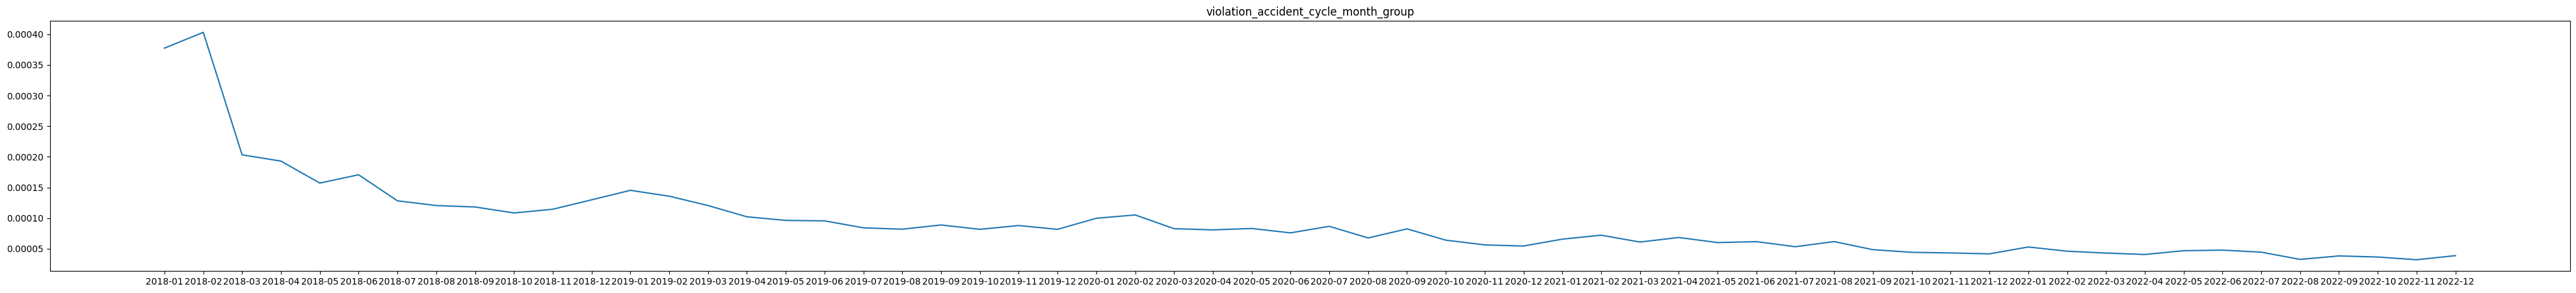

In [203]:
plt.figure(figsize=[50,5])
plt.plot(month_list, VALUE_list)
plt.title("violation_accident_cycle_month_group") 
plt.show()
